Import all the necessary libraries & functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from load_data import load_data


print('All the libraries are imported correctly.')

All the libraries are imported correctly.


Preprocess all the data from the first dataset and then split it into training and test datasets.

In [2]:
X, Y = load_data('data/dataset2.csv')

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

scaler = StandardScaler()

# Data standardization
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

data/dataset2.csv


Initialize and fit the data to the Random Forest model

In [3]:
random_forest_model = RandomForestClassifier()  
random_forest_model.fit(X_train, y_train)

# Make predictions on the test set
y_forest_pred = random_forest_model.predict(X_test)

Initialize and fit the data to the K-N Neighbors model

In [4]:
kn_neighbors_model = KNeighborsClassifier(n_neighbors=19)   
kn_neighbors_model.fit(X_train, y_train)

# Make predictions on the test set
y_knn_pred = kn_neighbors_model.predict(X_test)

Run Grid Search in order to find the best hyper-parameter for the K-N Neighbors model

In [5]:
grid_search_classification = GridSearchCV(kn_neighbors_model,
                           {
                                'n_neighbors': np.arange(1, 21)
                            },cv=5, scoring="accuracy",verbose=1,n_jobs=-1 #use all processors
)

grid_search_classification.fit(X,Y)

# Find out the best parameters for the classifier
print("Best classification hyper-parameters: %r" %grid_search_classification.best_params_)
print("Best accuracy: %.1f" %grid_search_classification.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best classification hyper-parameters: {'n_neighbors': 19}
Best accuracy: 1.0


Initialize and fit the data to the SVM model with rbf kernel

In [6]:
svm_rbf_kernel_model = SVC(kernel='rbf', C=1)  
svm_rbf_kernel_model.fit(X_train, y_train)

# Make predictions on the test set
y_rbf_pred = svm_rbf_kernel_model.predict(X_test)

Verify the accuracy of the model by using cross validation

In [7]:
random_forest_model_scores = cross_val_score(random_forest_model, X, Y, cv=5, scoring='accuracy')
kn_neighbors_model_scores = cross_val_score(kn_neighbors_model, X, Y, cv=5, scoring='accuracy')
svm_rbf_kernel_model_scores = cross_val_score(svm_rbf_kernel_model, X, Y, cv=5, scoring='accuracy')

# Print the cross-validation scores for each fold
print("Random Forest Model Cross-Validation Scores:", random_forest_model_scores)
print("K Neighbors Model Cross-Validation Scores:", kn_neighbors_model_scores)
print("Rbf kernel Cross-Validation Scores:", svm_rbf_kernel_model_scores)

print('\n')

# Calculate and print the mean and standard deviation of the scores
print("Random Forest Model Standard Deviation:", random_forest_model_scores.std(), " vs. K Neighbors Model Standard Deviation:", kn_neighbors_model_scores.std() ," vs. Rbf kernel Standard Deviation: ", svm_rbf_kernel_model_scores.std())
print("Random Forest Model Mean Accuracy: ", random_forest_model_scores.mean(), " vs. K Neighbors Model Mean Accuracy:", kn_neighbors_model_scores.mean(), " vs. Rbf kernel Mean Accuracy: ", svm_rbf_kernel_model_scores.mean())


Random Forest Model Cross-Validation Scores: [0.9713 0.9702 0.9752 0.9713 0.9749]
K Neighbors Model Cross-Validation Scores: [0.9723 0.9706 0.9741 0.9715 0.9751]
Rbf kernel Cross-Validation Scores: [0.9722 0.9703 0.9756 0.9732 0.9761]


Random Forest Model Standard Deviation: 0.0020585431741889544  vs. K Neighbors Model Standard Deviation: 0.0016569852141766113  vs. Rbf kernel Standard Deviation:  0.0021535087647836376
Random Forest Model Mean Accuracy:  0.97258  vs. K Neighbors Model Mean Accuracy: 0.97272  vs. Rbf kernel Mean Accuracy:  0.97348


Report the accuracy of the model 

In [8]:
random_forest_accuracy = accuracy_score(y_test, y_forest_pred)
random_forest_recall =  recall_score(y_test, y_forest_pred, average='micro')
random_forest_precision =  precision_score(y_test, y_forest_pred, average='micro')
random_forest_report = classification_report(y_test, y_forest_pred)

kn_neighbors_accuracy = accuracy_score(y_test, y_knn_pred)
kn_neighbors_recall = recall_score(y_test, y_knn_pred, average='micro')
kn_neighbors_precision = precision_score(y_test, y_knn_pred, average='micro')
kn_neighbors_report = classification_report(y_test, y_knn_pred)

rbf_k_accuracy = accuracy_score(y_test, y_rbf_pred)
rbf_k_recall = recall_score(y_test, y_rbf_pred, average='micro')
rbf_k_precision = precision_score(y_test, y_rbf_pred, average='micro')
rbf_k_report = classification_report(y_test, y_rbf_pred)

print("Random Forest Model Accuracy:", random_forest_accuracy, " vs. K Neighbors Model Accuracy: ", kn_neighbors_accuracy, " vs. Rbf Kernel Accuracy: ", rbf_k_accuracy)
print("Random Forest Model Recall:", random_forest_recall, " vs. K Neighbors Model Recall: ", kn_neighbors_recall, " vs. Rbf Kernel Recall: ", rbf_k_recall)
print("Random Forest Model Precision:", random_forest_precision, " vs. K Neighbors Model Precision: ", kn_neighbors_precision, " vs. Rbf Kernel Precision: ", rbf_k_precision)

# Report section
print("Random Forest Model Classification Report:\n", random_forest_report)
print("K Neighbors Model Classification Report:\n", kn_neighbors_report)
print("Rbf Kernel Classification Report:\n", rbf_k_report)

Random Forest Model Accuracy: 0.9710666666666666  vs. K Neighbors Model Accuracy:  0.9702  vs. Rbf Kernel Accuracy:  0.9710666666666666
Random Forest Model Recall: 0.9710666666666666  vs. K Neighbors Model Recall:  0.9702  vs. Rbf Kernel Recall:  0.9710666666666666
Random Forest Model Precision: 0.9710666666666666  vs. K Neighbors Model Precision:  0.9702  vs. Rbf Kernel Precision:  0.9710666666666666
Random Forest Model Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1473
           1       0.99      0.99      0.99      1477
           2       0.98      0.96      0.97      1500
           3       0.92      0.92      0.92      1542
           4       0.97      0.98      0.97      1437
           5       0.93      0.93      0.93      1545
           6       0.98      0.99      0.98      1465
           7       0.98      0.98      0.98      1491
           8       0.99      1.00      0.99      1546
          

Checking the performance of the model by using a confusion matrix - SVM w. RBF Kernel

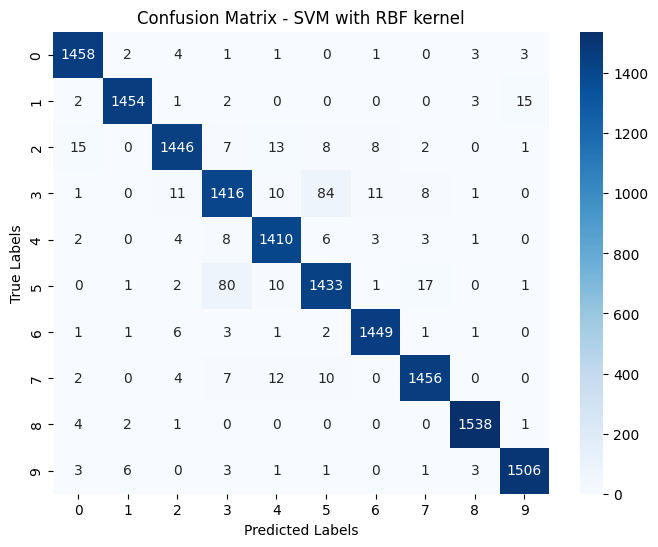

In [9]:
# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_rbf_pred) 

# Display the confusion matrix using a heatmap for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - SVM with RBF kernel')
plt.show()

Test the 'blind test dataset' on the trained SVM model

In [10]:
blind_test_data, y = load_data('data/blind_test2.csv')

# Standardize the feature data for the blind test dataset
X_blind = scaler.transform(blind_test_data)

# Make predictions on the blind test data
blind_test_predictions = svm_rbf_kernel_model.predict(X_blind)


df = pd.DataFrame(blind_test_data)

data/blind_test2.csv


Save the predictions for data in the 'blind tests' into a .csv file

In [ ]:
# Save the blind predictions to a file 
#df['X'] = df.apply(lambda row: row.values, axis=1)
df['Predicted_label_class'] = blind_test_predictions

# Remove all the columns from the dataframe except the last one: the last one is the Y column with the predictions.
df = df.iloc[:, -1:]

# Export predictions for data into a .csv file
df.to_csv('d2_2133421.csv', index=False)
